In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection  import train_test_split

In [69]:
df=pd.read_csv('D:\Jupyter Sketch\After_lockdown\ML\SUPERVISED ML\Lasso_&_Ridge(L1&L2)\MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
df['Bathroom']=np.mean(df['Bathroom'])
df['Parking']=np.mean(df['Parking'])
df['Per_Sqft']=np.mean(df['Per_Sqft'])

In [6]:
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [7]:
df['Furnishing']=df['Furnishing'].fillna(value='NO DATA')
df['Type']=df['Type'].fillna(value='NO DATA')

In [8]:
df.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [9]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.556086,Semi-Furnished,Rohini Sector 25,1.935563,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.556086,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.935563,5000000,Ready_to_move,New_Property,Apartment,15690.136542
2,950.0,2,2.556086,Furnished,"Citizen Apartment, Rohini Sector 13",1.935563,15500000,Ready_to_move,Resale,Apartment,15690.136542
3,600.0,2,2.556086,Semi-Furnished,Rohini Sector 24,1.935563,4200000,Ready_to_move,Resale,Builder_Floor,15690.136542
4,650.0,2,2.556086,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.935563,6200000,Ready_to_move,New_Property,Builder_Floor,15690.136542


In [10]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [27]:
df['Locality'].nunique()

365

In [11]:
df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', 'NO DATA'],
      dtype=object)

In [12]:
df['Status'].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [66]:
df['Transaction'].unique()

array([0, 1])

In [70]:
df['Type'].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_furnishing=LabelEncoder()
le_status=LabelEncoder()
le_transaction=LabelEncoder()
le_type=LabelEncoder()

In [16]:
df['Furnishing']=le_furnishing.fit_transform(df['Furnishing'])
df['Status']=le_status.fit_transform(df['Status'])
df['Transaction']=le_transaction.fit_transform(df['Transaction'])
df['Type']=le_type.fit_transform(df['Type'])

In [17]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.556086,2,Rohini Sector 25,1.935563,6500000,1,0,1,15690.136542
1,750.0,2,2.556086,2,"J R Designers Floors, Rohini Sector 24",1.935563,5000000,1,0,0,15690.136542
2,950.0,2,2.556086,0,"Citizen Apartment, Rohini Sector 13",1.935563,15500000,1,1,0,15690.136542
3,600.0,2,2.556086,2,Rohini Sector 24,1.935563,4200000,1,1,1,15690.136542
4,650.0,2,2.556086,2,Rohini Sector 24 carpet area 650 sqft status R...,1.935563,6200000,1,0,1,15690.136542


In [18]:
df.corr()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
Area,1.000000e+00,4.494376e-01,-5.899234e-18,1.625339e-02,1.188040e-16,5.808357e-01,-1.577688e-01,-1.162826e-01,8.948257e-02,-4.912638e-16
BHK,4.494376e-01,1.000000e+00,-8.651495e-16,-1.003166e-01,7.092500e-16,5.715229e-01,-1.204724e-01,-1.375740e-01,1.124243e-01,-6.452031e-16
Bathroom,-5.899234e-18,-8.651495e-16,1.000000e+00,-3.985061e-17,-1.000000e+00,-8.225249e-16,-8.707623e-16,4.254842e-16,1.455164e-15,-1.000000e+00
Furnishing,1.625339e-02,-1.003166e-01,-3.985061e-17,1.000000e+00,7.051008e-16,3.698407e-02,-4.479352e-02,-8.411355e-02,2.223927e-02,-1.850950e-16
Parking,1.188040e-16,7.092500e-16,-1.000000e+00,7.051008e-16,1.000000e+00,1.243971e-15,6.547234e-16,-1.239481e-15,4.704853e-16,1.000000e+00
Price,5.808357e-01,5.715229e-01,-8.225249e-16,3.698407e-02,1.243971e-15,1.000000e+00,-1.861288e-01,-2.182335e-01,1.076213e-01,1.171325e-15
Status,-1.577688e-01,-1.204724e-01,-8.707623e-16,-4.479352e-02,6.547234e-16,-1.861288e-01,1.000000e+00,2.594781e-01,3.292282e-02,-2.664492e-16
Transaction,-1.162826e-01,-1.375740e-01,4.254842e-16,-8.411355e-02,-1.239481e-15,-2.182335e-01,2.594781e-01,1.000000e+00,-2.171541e-01,9.953012e-16
Type,8.948257e-02,1.124243e-01,1.455164e-15,2.223927e-02,4.704853e-16,1.076213e-01,3.292282e-02,-2.171541e-01,1.000000e+00,-9.843617e-16
Per_Sqft,-4.912638e-16,-6.452031e-16,-1.000000e+00,-1.850950e-16,1.000000e+00,1.171325e-15,-2.664492e-16,9.953012e-16,-9.843617e-16,1.000000e+00


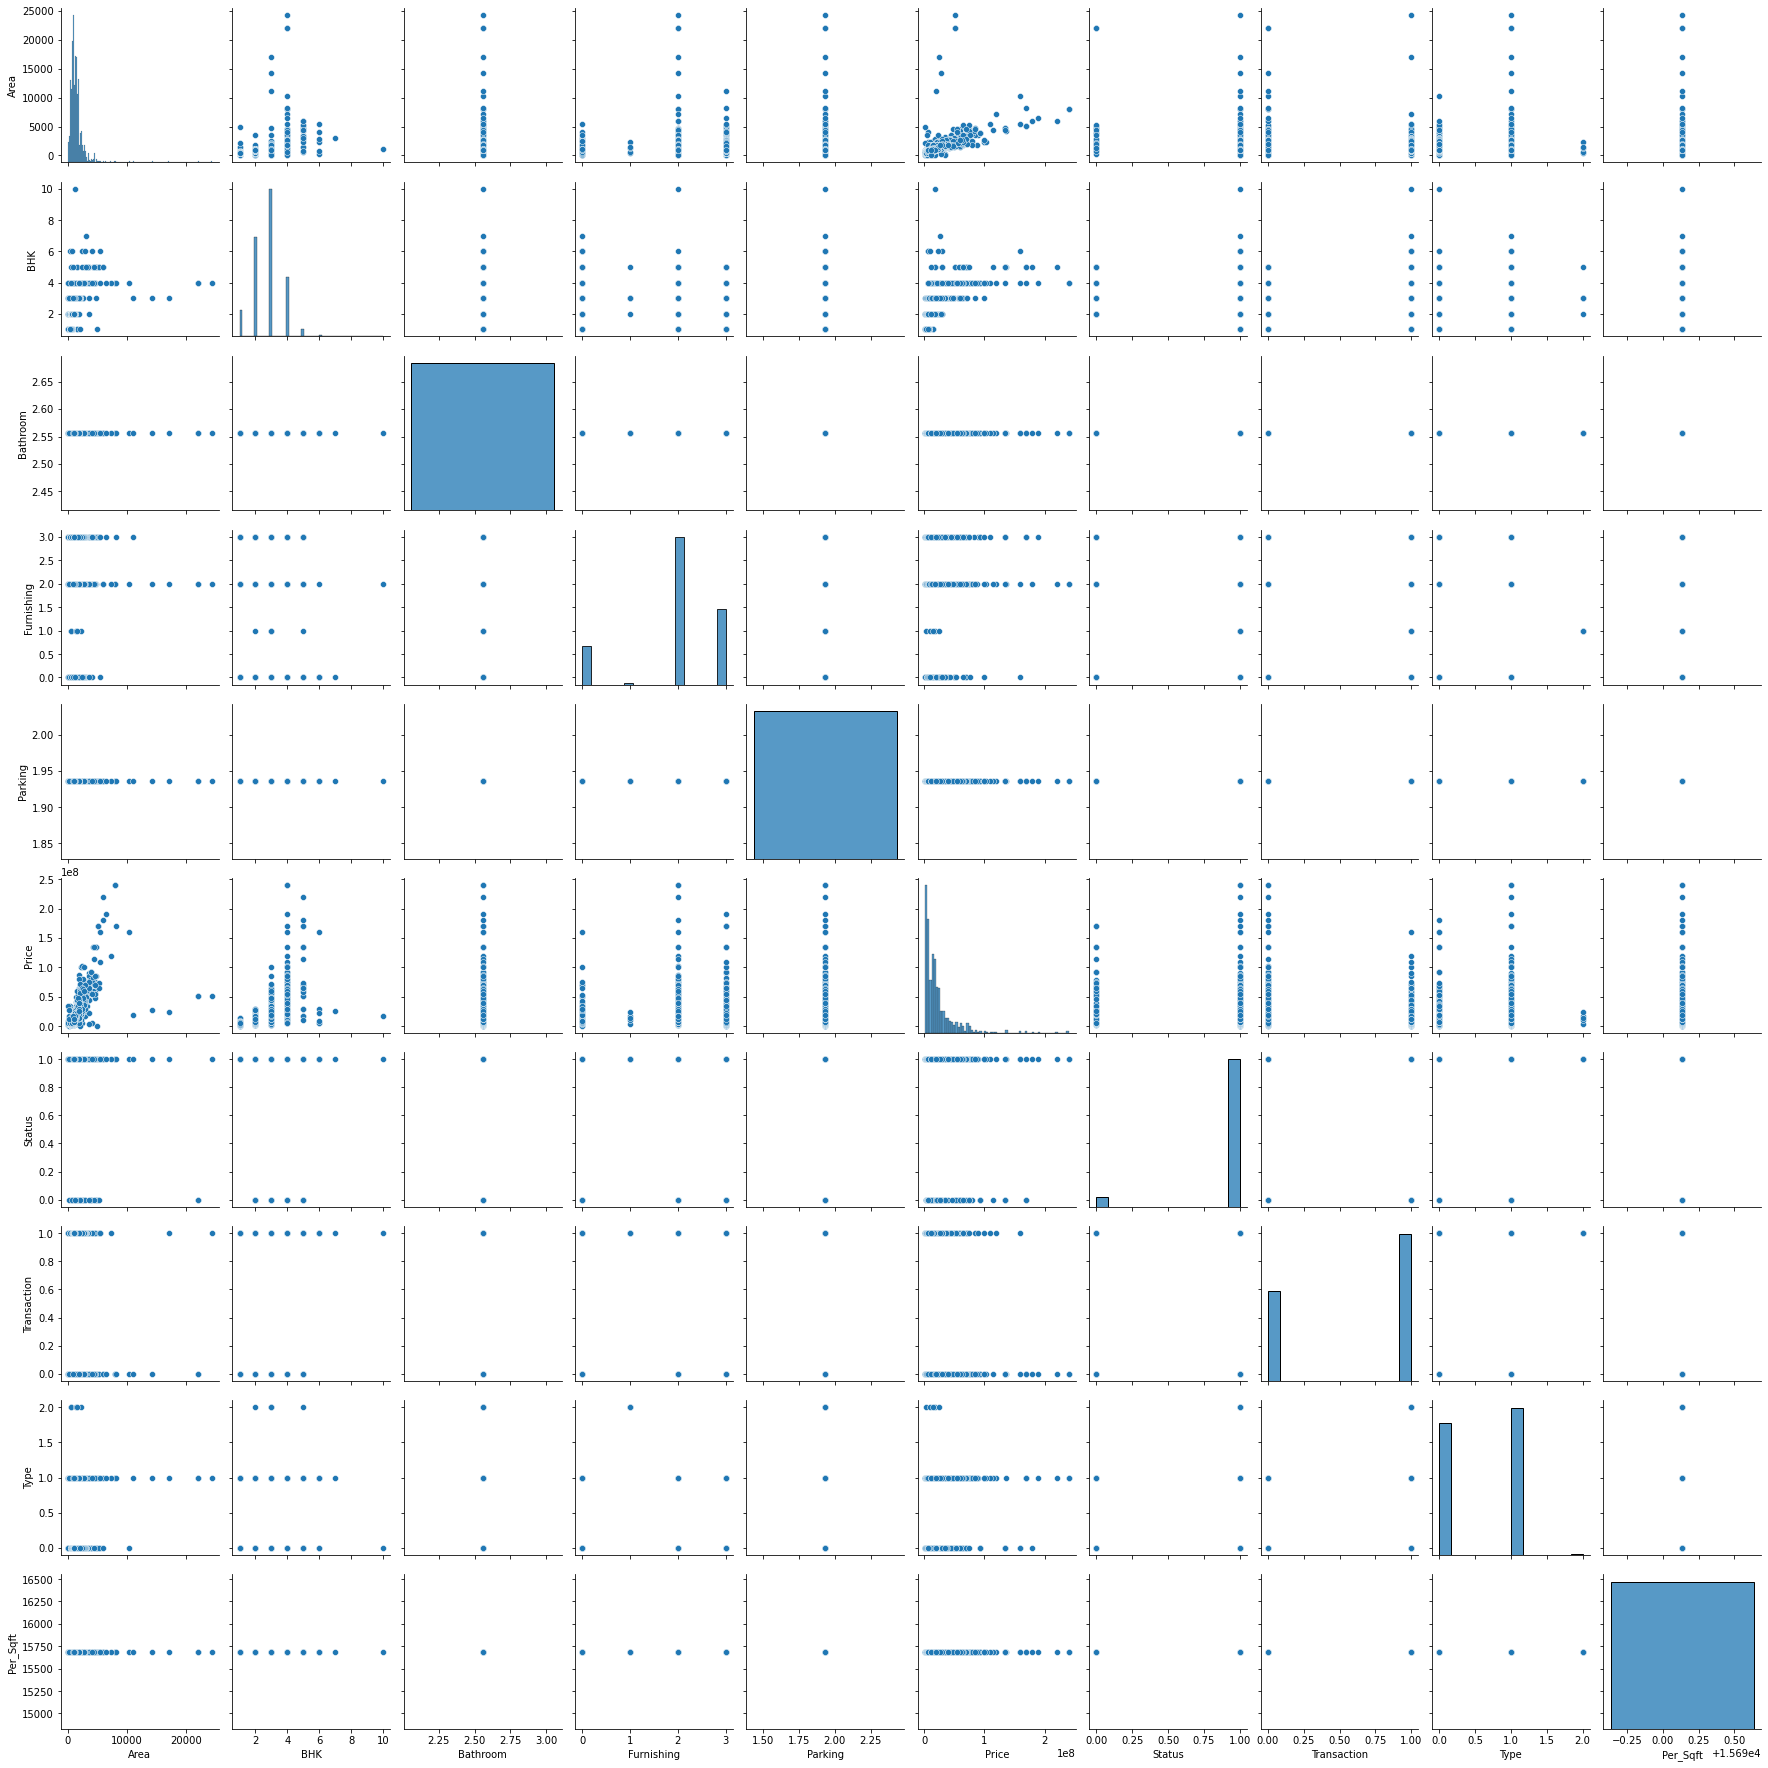

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

Text(0, 0.5, 'counts')

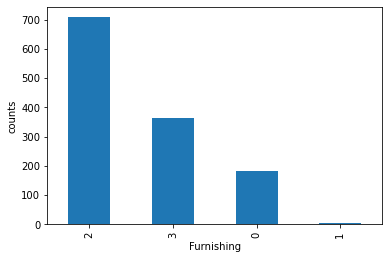

In [44]:
df['Furnishing'].value_counts().plot(kind='bar')
plt.xlabel('Furnishing')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

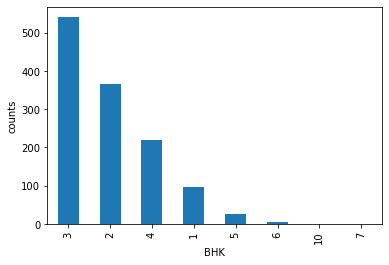

In [41]:
df['BHK'].value_counts().plot(kind='bar')
plt.xlabel('BHK')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

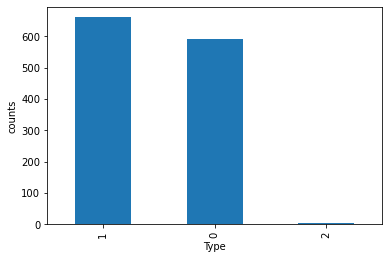

In [55]:
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

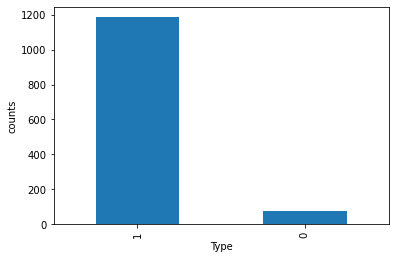

In [57]:
df['Status'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('counts')

In [56]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

Text(0, 0.5, 'counts')

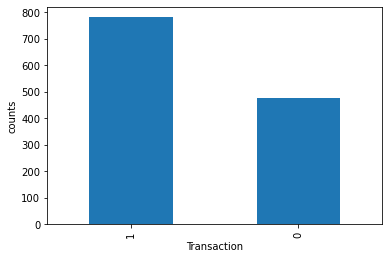

In [63]:
df['Transaction'].value_counts().plot(kind='bar')
plt.xlabel('Transaction')
plt.ylabel('counts')